## Insertions
Insertions_6k_SupportingPlots_AltvRef.ipynb

* Feature Importance
* Alt/Ref Distribution
* Reference (original analysis) : Feature_Importance_Distribution_AllTech_seaborn_dist.ipynb

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from bokeh.charts import Scatter, Bar, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
import seaborn as sns

In [2]:
# Import Data
df_train = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/6k.INS.test.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/6k.INS.test.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,GTconflict,GTcons,GTsupp,Ill250.GT,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,sample,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,type
0,-1,2,2,2.0,958.307692,17.827742,52.0,403.673077,79.999452,52.0,...,0.0,0,0,HG002,0,0.0,919991,1,1.0,Insertion


In [3]:
df_feat = df_train[['Ill300x.ref_reason_alignmentScore','Ill300x.alt_insertSize_std','Ill300x.alt_count','Ill250.ref_count','IllMP.alt_reason_alignmentScore','Ill250.ref_reason_alignmentScore','Ill250.alt_alnScore_std','Ill300x.ref_count','Ill300x.alt_reason_alignmentScore','Ill250.alt_insertSize_std','TenX.HP2_alt_reason_alignmentScore','Ill250.alt_reason_alignmentScore','Ill250.ref_alnScore_std','Ill250.ref_insertSize_std','Ill250.ref_insertSize_mean','IllMP.alt_insertSize_std','Ill300x.alt_alnScore_std','IllMP.ref_reason_alignmentScore','IllMP.alt_alnScore_mean','Ill250.alt_count','Ill250.ref_alnScore_mean','TenX.HP2_alt_count','pacbio.ref_reason_alignmentScore','IllMP.ref_alnScore_std','IllMP.ref_insertSize_std', 'GTcons']]

In [4]:
df_feat['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_feat['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_feat['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
df_feat_ = df_feat.dropna()

In [6]:
# Select Features for comparison
# Feature 1
hom_var_1 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Ill300x.ref_reason_alignmentScore']
het_var_1 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Ill300x.ref_reason_alignmentScore']
hom_ref_1 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill300x.ref_reason_alignmentScore']

# Feature 2
hom_var_2 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Ill300x.alt_insertSize_std']
het_var_2 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Ill300x.alt_insertSize_std']
hom_ref_2 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill300x.alt_insertSize_std']

# Feature 3
hom_var_3 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Ill300x.alt_count']
het_var_3 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Ill300x.alt_count']
hom_ref_3 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill300x.alt_count']

# Feature 4
hom_var_4 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Ill250.ref_count']
het_var_4 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Ill250.ref_count']
hom_ref_4 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill250.ref_count']

# Feature 5
hom_var_5 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['IllMP.alt_reason_alignmentScore']
het_var_5 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['IllMP.alt_reason_alignmentScore']
hom_ref_5 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['IllMP.alt_reason_alignmentScore']

# Feature 6
hom_var_6 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Ill250.ref_reason_alignmentScore']
het_var_6 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Ill250.ref_reason_alignmentScore']
hom_ref_6 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill250.ref_reason_alignmentScore']

# Feature 7
hom_var_7 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Ill250.alt_alnScore_std']
het_var_7 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Ill250.alt_alnScore_std']
hom_ref_7 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill250.alt_alnScore_std']

# Feature 8
hom_var_8 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Ill300x.ref_count']
het_var_8 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Ill300x.ref_count']
hom_ref_8 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill300x.ref_count']

# Feature 9
hom_var_9 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Ill300x.alt_reason_alignmentScore']
het_var_9 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill300x.alt_reason_alignmentScore']
hom_ref_9 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Ill300x.alt_reason_alignmentScore']



In [7]:
sns.set_style("white")

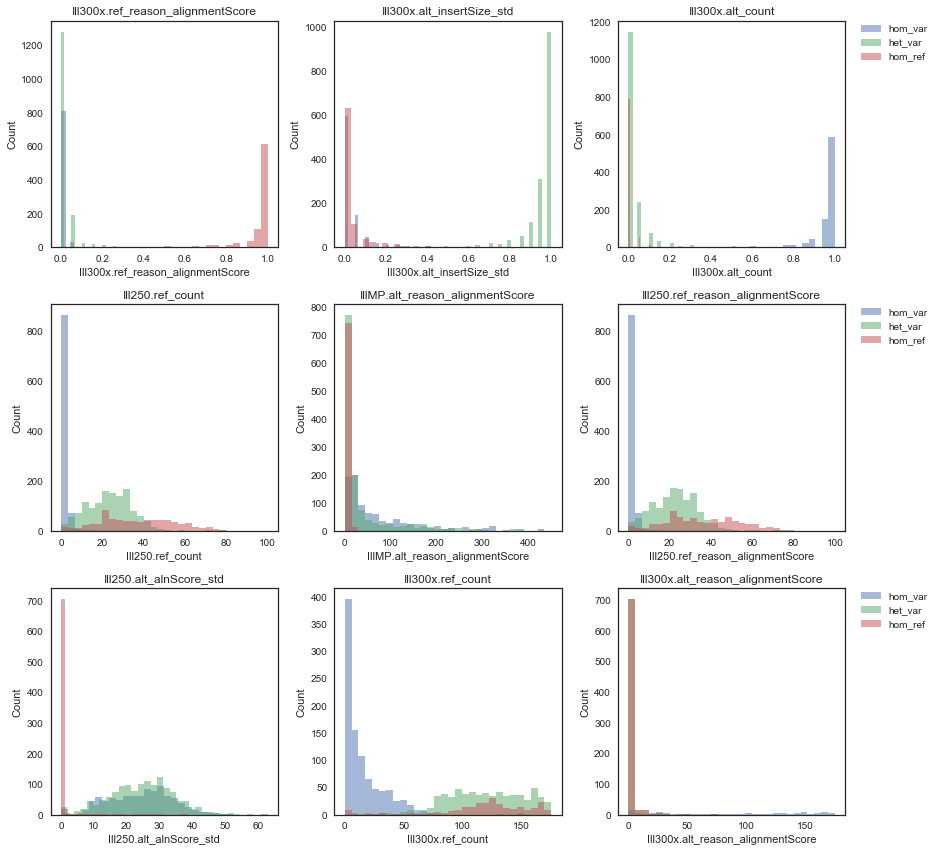

In [129]:
fig = plt.figure(figsize=(12,12))

# Feature 1 - Range adjusted to show distribution!!!
ax1 = fig.add_subplot(331)
ax1.grid(False)
hom_var_1.hist(alpha = 0.5, bins = 30, label='hom_var')
ax1.set_xlabel('Ill300x.ref_reason_alignmentScore')
ax1.set_ylabel('Count')
ax1.set_title('Ill300x.ref_reason_alignmentScore')

ax1 = fig.add_subplot(331)
het_var_1.hist(alpha = 0.5, bins = 30, label='het_var')

ax1 = fig.add_subplot(331)
hom_ref_1.hist(alpha = 0.5, bins = 30,label='hom_ref')



# Feature 2
ax2 = fig.add_subplot(332)
hom_var_2.hist(alpha = 0.5, bins = 30, label='hom_var')
ax2.set_xlabel('Ill300x.alt_insertSize_std')
ax2.set_ylabel('Count')
ax2.set_title('Ill300x.alt_insertSize_std')

ax2 = fig.add_subplot(332)
het_var_2.hist(alpha = 0.5, bins = 30, label='het_var')

ax2 = fig.add_subplot(332)
hom_ref_2.hist(alpha = 0.5, bins = 30, label='hom_ref')



# Feature 3
ax3 = fig.add_subplot(333)
hom_var_3.hist(alpha = 0.5, bins = 30, label='hom_var')
ax3.set_xlabel('Ill300x.alt_count')
ax3.set_ylabel('Count')
ax3.set_title('Ill300x.alt_count')

ax3 = fig.add_subplot(333)
het_var_3.hist(alpha = 0.5, bins = 30, label='het_var')

ax3 = fig.add_subplot(333)
hom_ref_3.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Feature 4 - Range adjusted to show distribution!!
ax4 = fig.add_subplot(334)
hom_var_4.hist(alpha = 0.5, bins = 30, range=(0, 100), label='hom_var')
ax4.set_xlabel('Ill250.ref_count')
ax4.set_ylabel('Count')
ax4.set_title('Ill250.ref_count')

ax4 = fig.add_subplot(334)
het_var_4.hist(alpha = 0.5, bins = 30, range=(0, 100), label='het_var')

ax4 = fig.add_subplot(334)
hom_ref_4.hist(alpha = 0.5, bins = 30, range=(0, 100), label='hom_ref')


# Feature 5
ax5 = fig.add_subplot(335)
hom_var_5.hist(alpha = 0.5, bins = 30, range=(0, 450), label='hom_var')
ax5.set_xlabel('IllMP.alt_reason_alignmentScore')
ax5.set_ylabel('Count')
ax5.set_title('IllMP.alt_reason_alignmentScore')

ax5 = fig.add_subplot(335)
het_var_5.hist(alpha = 0.5, bins = 30, range=(0, 450), label='het_var')

ax5 = fig.add_subplot(335)
hom_ref_5.hist(alpha = 0.5, bins = 30, range=(0, 450), label='hom_ref')


# Feature 6
ax6 = fig.add_subplot(336)
hom_var_6.hist(alpha = 0.5, range=(0, 100), bins = 30, label='hom_var')
ax6.set_xlabel('Ill250.ref_reason_alignmentScore')
ax6.set_ylabel('Count')
ax6.set_title('Ill250.ref_reason_alignmentScore')

ax6 = fig.add_subplot(336)
het_var_6.hist(alpha = 0.5, range=(0, 100), bins = 30, label='het_var')

ax6 = fig.add_subplot(336)
hom_ref_6.hist(alpha = 0.5, range=(0, 100), bins = 30, label='hom_ref')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Feature 7
ax7 = fig.add_subplot(337)
hom_var_7.hist(alpha = 0.5, bins = 30, label='hom_var')
ax7.set_xlabel('Ill250.alt_alnScore_std')
ax7.set_ylabel('Count')
ax7.set_title('Ill250.alt_alnScore_std')

ax7 = fig.add_subplot(337)
het_var_7.hist(alpha = 0.5, bins = 30, label='het_var')

ax7 = fig.add_subplot(337)
hom_ref_7.hist(alpha = 0.5, bins = 30, label='hom_ref')


# Feature 8
ax8 = fig.add_subplot(338)
hom_var_8.hist(alpha = 0.5, range=(0, 175), bins = 30, label='hom_var')
ax8.set_xlabel('Ill300x.ref_count')
ax8.set_ylabel('Count')
ax8.set_title('Ill300x.ref_count')

ax8 = fig.add_subplot(338)
het_var_8.hist(alpha = 0.5, range=(0, 175), bins = 30, label='het_var')

ax8 = fig.add_subplot(338)
hom_ref_8.hist(alpha = 0.5, range=(0, 175), bins = 30, label='hom_ref')


# Feature 9 - NOTE: The range has been changed to see distribution!!
ax9 = fig.add_subplot(339)
hom_var_9.hist(alpha = 0.5, bins = 30, range=(0, 175), label='hom_var')
ax9.set_xlabel('Ill300x.alt_reason_alignmentScore')
ax9.set_ylabel('Count')
ax9.set_title('Ill300x.alt_reason_alignmentScore')

ax9 = fig.add_subplot(339)
het_var_9.hist(alpha = 0.5, bins = 30, range=(0, 175), label='het_var')

ax9 = fig.add_subplot(339)
hom_ref_9.hist(alpha = 0.5, bins = 30, range=(0, 175), label='hom_ref')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)
ax5.grid(False)
ax6.grid(False)
ax7.grid(False)
ax8.grid(False)
ax9.grid(False)

fig.tight_layout()

plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/top_6feat_INS_6k.png', bbox_inches='tight')
plt.show()



In [9]:
df_feat = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/dataframes/df_alldata_6000_df2.csv')

In [10]:
df_feat['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_feat['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_feat['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [11]:
df_feat_ = df_feat.dropna()

In [12]:
# Select Features for comparison
# Feature 1
hom_var_1 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Homozygous_Reference_GTcons']
het_var_1 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Homozygous_Reference_GTcons']
hom_ref_1 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

# Feature 2
hom_var_2 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Heterozygous_Variant_GTcons']
het_var_2 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
hom_ref_2 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Heterozygous_Variant_GTcons']

# Feature 3
hom_var_3 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
het_var_3 = df_feat_[df_feat_['GTcons'] == 'Heterozygous_Variant']['Homozygous_Variant_GTcons']
hom_ref_3 = df_feat_[df_feat_['GTcons'] == 'Homozygous_Reference']['Homozygous_Variant_GTcons']

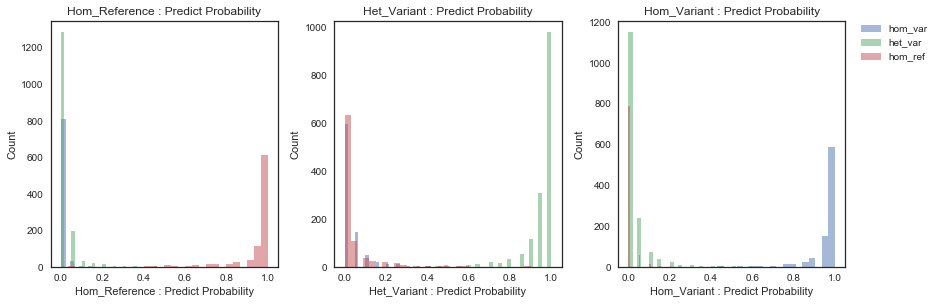

In [119]:
fig = plt.figure(figsize=(12,12))

# Feature 1 - Range adjusted to show distribution!!!
ax1 = fig.add_subplot(331)
ax1.grid(False)
hom_var_1.hist(alpha = 0.5, bins = 30,  label='hom_var')
ax1.set_xlabel('Hom_Reference : Predict Probability')
ax1.set_ylabel('Count')
ax1.set_title('Hom_Reference : Predict Probability')

ax1 = fig.add_subplot(331)
het_var_1.hist(alpha = 0.5, bins = 30,  label='het_var')

ax1 = fig.add_subplot(331)
hom_ref_1.hist(alpha = 0.5, bins = 30, label='hom_ref')


# Feature 2
ax2 = fig.add_subplot(332)
hom_var_2.hist(alpha = 0.5, bins = 30, label='hom_var')
ax2.set_xlabel('Het_Variant : Predict Probability')
ax2.set_ylabel('Count')
ax2.set_title('Het_Variant : Predict Probability')

ax2 = fig.add_subplot(332)
het_var_2.hist(alpha = 0.5, bins = 30, label='het_var')

ax2 = fig.add_subplot(332)
hom_ref_2.hist(alpha = 0.5, bins = 30, label='hom_ref')



# Feature 3
ax3 = fig.add_subplot(333)
hom_var_3.hist(alpha = 0.5, bins = 30,  label='hom_var')
ax3.set_xlabel('Hom_Variant : Predict Probability')
ax3.set_ylabel('Count')
ax3.set_title('Hom_Variant : Predict Probability')

ax3 = fig.add_subplot(333)
het_var_3.hist(alpha = 0.5, bins = 30,  label='het_var')

ax3 = fig.add_subplot(333)
hom_ref_3.hist(alpha = 0.5, bins = 30, label='hom_ref')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
fig.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/INS_pred_probdist.png', bbox_inches='tight')
plt.show()




** Alt vs Ref Counts **

In [14]:
df_train = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/dataframes/df_alldata_6000_df1.csv')

*** PacBio ***

In [15]:
df_train["pacbio_ref_count"] = df_train["pacbio.ref_count"] + 0.1
df_train["pacbio_alt_count"] = df_train["pacbio.alt_count"] + 0.1

df_train['ref_log'] = np.log10(df_train.pacbio_ref_count)
df_train['alt_log'] = np.log10(df_train.pacbio_alt_count)

In [16]:
#Size Bins
bins = [0, 50, 100,500,1000,5000,10000,45516]
df_train['Size'] = df_train['Size'].abs()
group_names_size = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-45516']
df_train['size_bin'] = pd.cut(df_train['Size'], bins, labels=group_names_size)

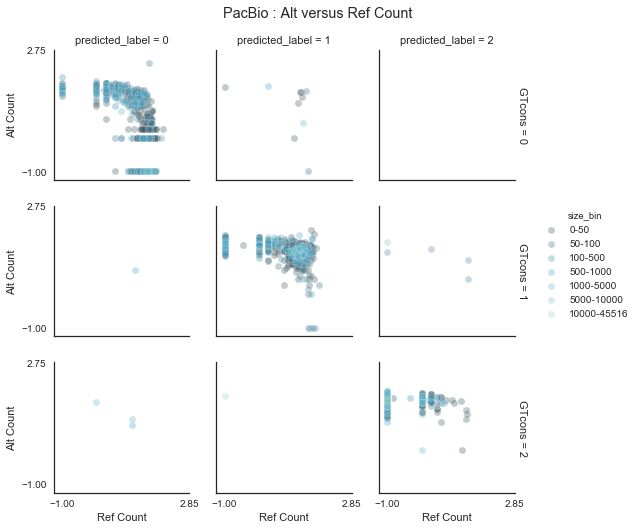

In [17]:
g = sns.FacetGrid(df_train, row="GTcons", col="predicted_label", margin_titles=True, size=2.5, hue = "size_bin", palette="GnBu_d")
g.map(plt.scatter, "ref_log", "alt_log", edgecolor="white", lw=.5, alpha=.3);
g.set_axis_labels("Ref Count", "Alt Count");
g.set(xticks=[-1, 2.85], yticks=[-1, 2.75]);
g.fig.subplots_adjust(wspace=.2, hspace=.2);
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PacBio : Alt versus Ref Count');
g.add_legend();
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/PB_altRef_size.png', bbox_inches='tight')


plt.show(g)

*** 300X ***

In [18]:
df_train["Ill300x_ref_count"] = df_train["Ill300x.ref_count"] + 0.1
df_train["Ill300x_alt_count"] = df_train["Ill300x.alt_count"] + 0.1

df_train['ref_log'] = np.log10(df_train.Ill300x_ref_count)
df_train['alt_log'] = np.log10(df_train.Ill300x_alt_count)

In [19]:
#Size Bins
bins = [0, 50, 100,500,1000,5000,10000,45516]
df_train['Size'] = df_train['Size'].abs()
group_names_size = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-45516']
df_train['size_bin'] = pd.cut(df_train['Size'], bins, labels=group_names_size)

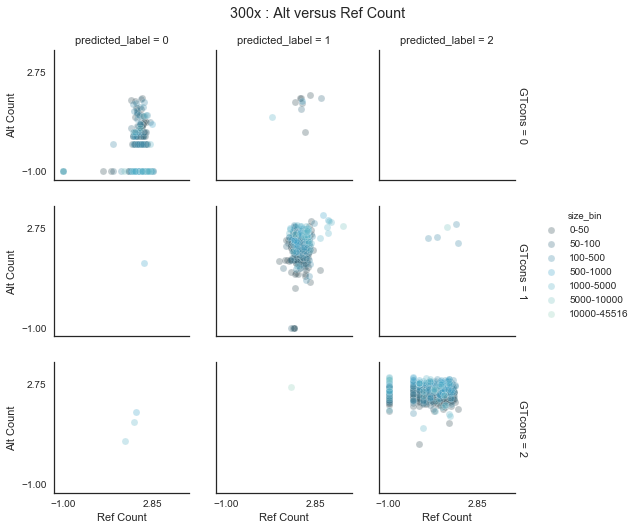

In [20]:
g = sns.FacetGrid(df_train, row="GTcons", col="predicted_label", margin_titles=True, size=2.5, hue = "size_bin", palette="GnBu_d")
g.map(plt.scatter, "ref_log", "alt_log", edgecolor="white", lw=.5, alpha=.3);
g.set_axis_labels("Ref Count", "Alt Count");
g.set(xticks=[-1, 2.85], yticks=[-1, 2.75]);
g.fig.subplots_adjust(wspace=.2, hspace=.2);
plt.subplots_adjust(top=0.9)
g.fig.suptitle('300x : Alt versus Ref Count');
g.add_legend();
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/300x_altRef_size.png', bbox_inches='tight')


plt.show(g)

** Optimal Training Data **

In [21]:
df = pd.DataFrame()
df['No. Datapoints in Training Set'] = [100, 500, 1000, 1500, 2000, 2500, 3000, 3182]
df['Model Accuracy'] = [0.975, 0.985, 0.99, 0.992, 0.992, 0.991, 0.992, 0.994]

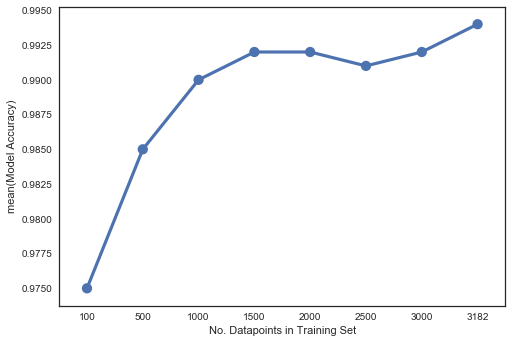

In [22]:
ax = sns.pointplot(x="No. Datapoints in Training Set", y="Model Accuracy", data=df)
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/AllData_Optimal_Training_Data_Top.png', bbox_inches='tight')
plt.show(ax)

In [23]:
df = pd.DataFrame()
df['No. Datapoints in Training Set'] = [0, 100, 500, 1000, 1500, 2000, 2500, 3000, 3182]
df['Model Accuracy'] = [0, 0.975, 0.985, 0.99, 0.992, 0.992, 0.991, 0.992, 0.994]

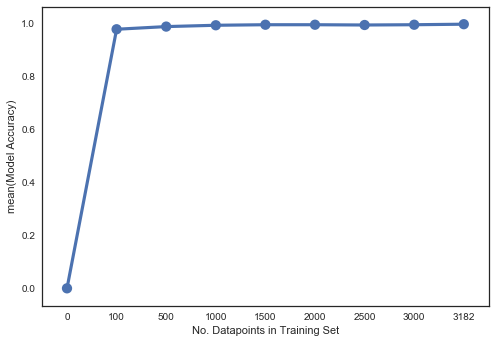

In [24]:
ax = sns.pointplot(x="No. Datapoints in Training Set", y="Model Accuracy", data=df)
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/AllData_Optimal_Training_Data.png', bbox_inches='tight')
plt.show(ax)

In [104]:
# Size comparison
# Split test data

In [105]:
df_train = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/6k.INS.test.csv')
df_test = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/test/5k.INS.test.csv')

In [106]:
df_train['Size'].abs()
df_test['Size'].abs()
df_test = df_test[df_test['Size'] >= 20]
df_train = df_train[df_train['Size'] >= 20]

df_train['log_size'] = np.log10(df_train.Size)
df_test['log_size'] = np.log10(df_test.Size)

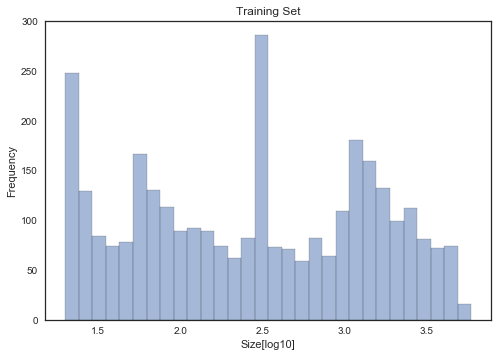

In [107]:
sns.set_style("white")
p = df_train['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
p.grid(False)
p.set_xlabel('Size[log10]')
p.set_ylabel('Frequency')
p.set_title('Training Set')
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/INS_SizeDist_training.png', bbox_inches='tight')
plt.show()

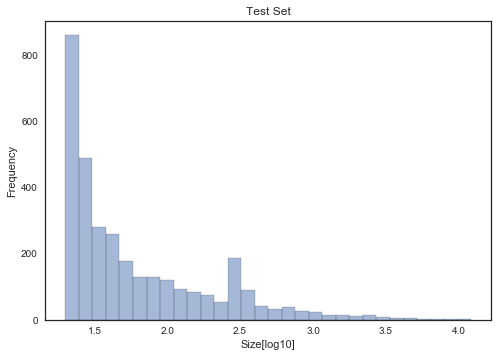

In [108]:
sns.set_style("white")
p = df_test['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
p.grid(False)
p.set_xlabel('Size[log10]')
p.set_ylabel('Frequency')
p.set_title('Test Set')
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/INS_SizeDist_test.png', bbox_inches='tight')
plt.show()

In [109]:
#Size Bins
bins = [0, 50, 100,300,400,1000,5999,45516]
df_test['Size'] = df_test['Size'].abs()
group_names_size = ['0-50', '50-100', '100-300', '300-400', '400-1000', '1000-5999', '6000+']
df_test['size_bin'] = pd.cut(df_test['Size'], bins, labels=group_names_size)

In [110]:
df_train = df_train[df_train['GTcons'] != -1]
df_test = df_test[df_test['GTcons'] != -1]

In [111]:
pd.value_counts(df_test['size_bin'].values, sort=True)

0-50         1938
50-100        465
100-300       426
300-400       198
400-1000      143
1000-5999      93
6000+           5
dtype: int64

In [112]:
#Create New test sets based on size
df_test.drop(['log_size'], axis=1, inplace = True)

#Separate dataframes based on size_bin
df_20to50 = df_test[df_test['size_bin'].str.contains('0-50')]
df_50to100 = df_test[df_test['size_bin'].str.contains('50-100')]
df_100to300 = df_test[df_test['size_bin'].str.contains('100-300')]
df_300to400 = df_test[df_test['size_bin'].str.contains('300-400')]
df_400to1000 = df_test[df_test['size_bin'].str.contains('400-1000')]
df_1000to6000 = df_test[df_test['size_bin'].str.contains('1000-5999')]
df_6000 = df_test[df_test['size_bin'].str.contains('6000+')]

# Drop Size Bin column
df_20to50.drop(['size_bin'], axis=1, inplace = True)
df_50to100.drop(['size_bin'], axis=1, inplace = True)
df_100to300.drop(['size_bin'], axis=1, inplace = True)
df_300to400.drop(['size_bin'], axis=1, inplace = True)
df_400to1000.drop(['size_bin'], axis=1, inplace = True)
df_1000to6000.drop(['size_bin'], axis=1, inplace = True)
df_6000.drop(['size_bin'], axis=1, inplace = True)

# Randomly sample (300 per group)
df_20to50_ = pd.DataFrame(df_20to50)
df_50to100_ = pd.DataFrame(df_50to100)
df_100to300_ = pd.DataFrame(df_100to300)
df_300to400_ = pd.DataFrame(df_300to400)
df_400to1000_ = pd.DataFrame(df_400to1000)
df_1000to6000_ = pd.DataFrame(df_1000to6000)
df_6000_ = pd.DataFrame(df_6000)


df_20to50_2 = df_20to50_.sample(200)
df_50to100_2 = df_50to100_.sample(200)
df_100to300_2 = df_100to300_.sample(200)
df_300to400_2 = df_300to400_.sample(198)
df_400to1000_2 = df_400to1000_.sample(143)
df_1000to6000_2 = df_1000to6000_.sample(93)
df_6000_2 = df_6000_.sample(5)

all_ = pd.concat([df_20to50_2, df_50to100_2, df_100to300_2, df_300to400_2, df_400to1000_2, df_1000to6000_2, df_6000_2], axis=0)
all_ = all_.drop_duplicates()


/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:17: Settin

In [113]:
all_.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/All_size_sample_TestSet.csv',index=False)
df_20to50_2.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/20to50_size_sample_TestSet.csv',index=False)
df_50to100_2.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/50to100_size_sample_TestSet.csv',index=False)
df_100to300_2.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/100to300_size_sample_TestSet.csv',index=False)
df_300to400_2.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/300to400_size_sample_TestSet.csv',index=False)
df_400to1000_2.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/400to1000_size_sample_TestSet.csv',index=False)
df_1000to6000_2.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/1000to6000_size_sample_TestSet.csv',index=False)
df_6000_2.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/6000_size_sample_TestSet.csv',index=False)

In [103]:
sns.set_style("white")
p = all_['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
p.grid(False)
p.set_xlabel('Size[log10]')
p.set_ylabel('Frequency')
p.set_title('Test Set')
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/INS_SizeDist_test_new.png', bbox_inches='tight')
plt.show()

KeyError: 'log_size'

In [115]:
df_test = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/min1_DFs/INS/ins_HG002_min1.csv')

In [116]:
df_train['Size'].abs()
df_test['Size'].abs()
df_test = df_test[df_test['Size'] >= 20]
df_train = df_train[df_train['Size'] >= 20]

df_train['log_size'] = np.log10(df_train.Size)
df_test['log_size'] = np.log10(df_test.Size)

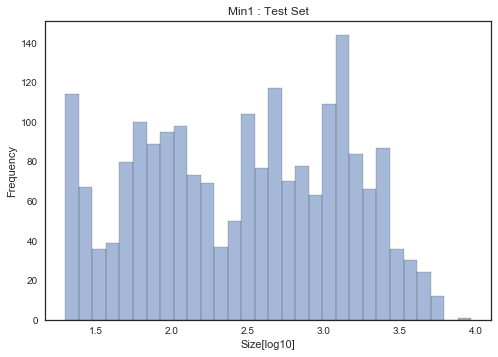

In [118]:
sns.set_style("white")
p = df_test['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
p.grid(False)
p.set_xlabel('Size[log10]')
p.set_ylabel('Frequency')
p.set_title('Min1 : Test Set')
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/INS_SizeDist_test_min1.png', bbox_inches='tight')
plt.show()